In [1]:
%load_ext autoreload
%autoreload 2 

In [7]:
from malwareDetector import malwareDetector
from dataLoader import DatasetLoad
from opcodeVectorize import OpcodeVectorizer

detector = malwareDetector(cluster=False, train=True, val=True, cpuArch="x86_64",
                            support_shots=5, query_shots=5, class_per_iter=5, class_per_iter_test=5,
                            hidden_size=64, output_size=64, iterations=100,
                            loss="nn_prototypical", dropout_prob=0.5, cuda=True, dataset="diec",
                            )

dataset = DatasetLoad(detector)

vectorize = OpcodeVectorizer(method = "word2vec", detector = detector, dataset=dataset)

Loading all datasets...
train dataset shape: (860, 3)
train dataset family number: 43
test dataset shape: (200, 3)
test dataset family number: 10
val dataset shape: (200, 3)
val dataset family number: 10
Vectorizing byte sequence using Word2Vec.


In [8]:
print("Vectorize Method: ", vectorize.vectorize_method)
# featureDim = 200
# n_gramRange = (1, 3)
vector_size = 100
window = 3
min_count = 1


# train_X, test_X, val_X, train_y, test_y, val_y, train_map, test_map, val_map = vectorize.vectorize_func(featureDim, n_gramRange)
train_X, test_X, val_X, train_y, test_y, val_y, train_map, test_map, val_map = vectorize.vectorize_func(vector_size, window, min_count)

Vectorize Method:  word2vec
Vectorizing opcode and saving to ./embedding/diec...
Training Word2Vec model...
Training Word2Vec model done.
Vectorizing byte sequence done.
Vectorizing byte sequence done.
vectorzie_train shape: (860, 100)
vectorzie_test shape: (200, 100)
train_label_mapping: {0: 'adore', 1: 'aenjaris', 2: 'blueshell', 3: 'chisel', 4: 'cleanlog', 5: 'cobaltstrike', 6: 'ddosia', 7: 'diamorphine', 8: 'dirtycow', 9: 'dnsamp', 10: 'dnscat', 11: 'drtycow', 12: 'ebury', 13: 'elfpatcher', 14: 'emperor', 15: 'ezuriloader', 16: 'fakeapp', 17: 'fritzfrog', 18: 'gafgyt', 19: 'horsepill', 20: 'kaiji', 21: 'lady', 22: 'malsource', 23: 'malxmr', 24: 'merlin', 25: 'meterpreter', 26: 'mirai', 27: 'multiverze', 28: 'pkexecexploit', 29: 'prism', 30: 'prochider', 31: 'rekoobe', 32: 'reversessh', 33: 'revproxy', 34: 'sickabs', 35: 'skidmap', 36: 'sliver', 37: 'sshdoor', 38: 'stowaway', 39: 'wacatac', 40: 'wellmess', 41: 'winexe', 42: 'xmrminer'}
test_label_mapping: {0: 'cryptonote', 1: 'hive'

In [9]:
print("Train X shape: ", train_X.shape, type(train_X))
print("Train y shape: ", train_y.shape, type(train_y))
print("Test X shape: ", test_X.shape)
print("Test y shape: ", test_y.shape)
if(val_X is not None):
    print("Val X shape: ", val_X.shape)
    print("Val y shape: ", val_y.shape)
print("Train Map: ", train_map)
print("Test Map: ", test_map)
if(val_map is not None):
    print("Val Map: ", val_map)

Train X shape:  (860, 100) <class 'numpy.ndarray'>
Train y shape:  (860,) <class 'numpy.ndarray'>
Test X shape:  (200, 100)
Test y shape:  (200,)
Val X shape:  (200, 100)
Val y shape:  (200,)
Train Map:  {0: 'adore', 1: 'aenjaris', 2: 'blueshell', 3: 'chisel', 4: 'cleanlog', 5: 'cobaltstrike', 6: 'ddosia', 7: 'diamorphine', 8: 'dirtycow', 9: 'dnsamp', 10: 'dnscat', 11: 'drtycow', 12: 'ebury', 13: 'elfpatcher', 14: 'emperor', 15: 'ezuriloader', 16: 'fakeapp', 17: 'fritzfrog', 18: 'gafgyt', 19: 'horsepill', 20: 'kaiji', 21: 'lady', 22: 'malsource', 23: 'malxmr', 24: 'merlin', 25: 'meterpreter', 26: 'mirai', 27: 'multiverze', 28: 'pkexecexploit', 29: 'prism', 30: 'prochider', 31: 'rekoobe', 32: 'reversessh', 33: 'revproxy', 34: 'sickabs', 35: 'skidmap', 36: 'sliver', 37: 'sshdoor', 38: 'stowaway', 39: 'wacatac', 40: 'wellmess', 41: 'winexe', 42: 'xmrminer'}
Test Map:  {0: 'cryptonote', 1: 'hive', 2: 'pnscan', 3: 'psybnc', 4: 'rozena', 5: 'sshdkit', 6: 'tsunami', 7: 'vtflooder', 8: 'winnti

In [10]:
if detector.train:
    best_state, best_acc, train_loss, train_acc, val_loss, val_acc = detector.trainModel(train_X=train_X, train_Y = train_y, val_X=val_X, val_Y=val_y, save_model=True)

Classes per iteration: 5
N-shot: 5


/home/mandy900619/Tools/Anaconda/envs/byteSequence/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


=== Epoch: 0 ===
Avg Train Loss: 1.6653159189224243, Avg Train Acc: 0.3967999984323978 (Best)
Avg Val Loss: 0.6638181433081627, Avg Val Acc: 0.9233333373069763 (Best)
Model saved at ./model/diec/model_x86_64_nn_prototypical_withVal.pt
=== Epoch: 1 ===
Avg Train Loss: 1.3850858026742936, Avg Train Acc: 0.44999999955296516 (Best: 0.9233333373069763)
Avg Val Loss: 0.6722772401571274, Avg Val Acc: 0.9029333347082138 (Best: 0.9233333373069763)
=== Epoch: 2 ===
Avg Train Loss: 1.1508385366201401, Avg Train Acc: 0.5088000011444092 (Best: 0.9233333373069763)
Avg Val Loss: 0.6319788619875908, Avg Val Acc: 0.9093333357572555 (Best: 0.9233333373069763)
=== Epoch: 3 ===
Avg Train Loss: 1.088287096619606, Avg Train Acc: 0.5608000016212463 (Best: 0.9233333373069763)
Avg Val Loss: 0.5857744923233986, Avg Val Acc: 0.9101333385705948 (Best: 0.9233333373069763)
=== Epoch: 4 ===
Avg Train Loss: 1.0552566808462143, Avg Train Acc: 0.5451999999582767 (Best: 0.9233333373069763)
Avg Val Loss: 0.58982685804367

In [11]:
detector.testModel(test_X=test_X, test_Y=test_y, modelState=best_state)

Load model from ./model/diec/model_x86_64_nn_prototypical_withVal.pt
Model : PrototypeNet(
  (embedding_model): OpcodeEmbedding(
    (layers): Sequential(
      (0): Linear(in_features=100, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.5, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): ReLU()
    )
  )
)
Test Acc: 0.8594133349657058


0.8594133349657058

In [12]:
detector.testModel(test_X=test_X, test_Y=test_y, modelPath="NULL")

No model loaded
Model : PrototypeNet(
  (embedding_model): OpcodeEmbedding(
    (layers): Sequential(
      (0): Linear(in_features=100, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.5, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): ReLU()
    )
  )
)
Test Acc: 0.9205066702961922


0.9205066702961922

In [8]:
from plot import plot
import numpy as np
plotting = plot(detector)

AttributeError: 'malwareDetector' object has no attribute 'mkdir'

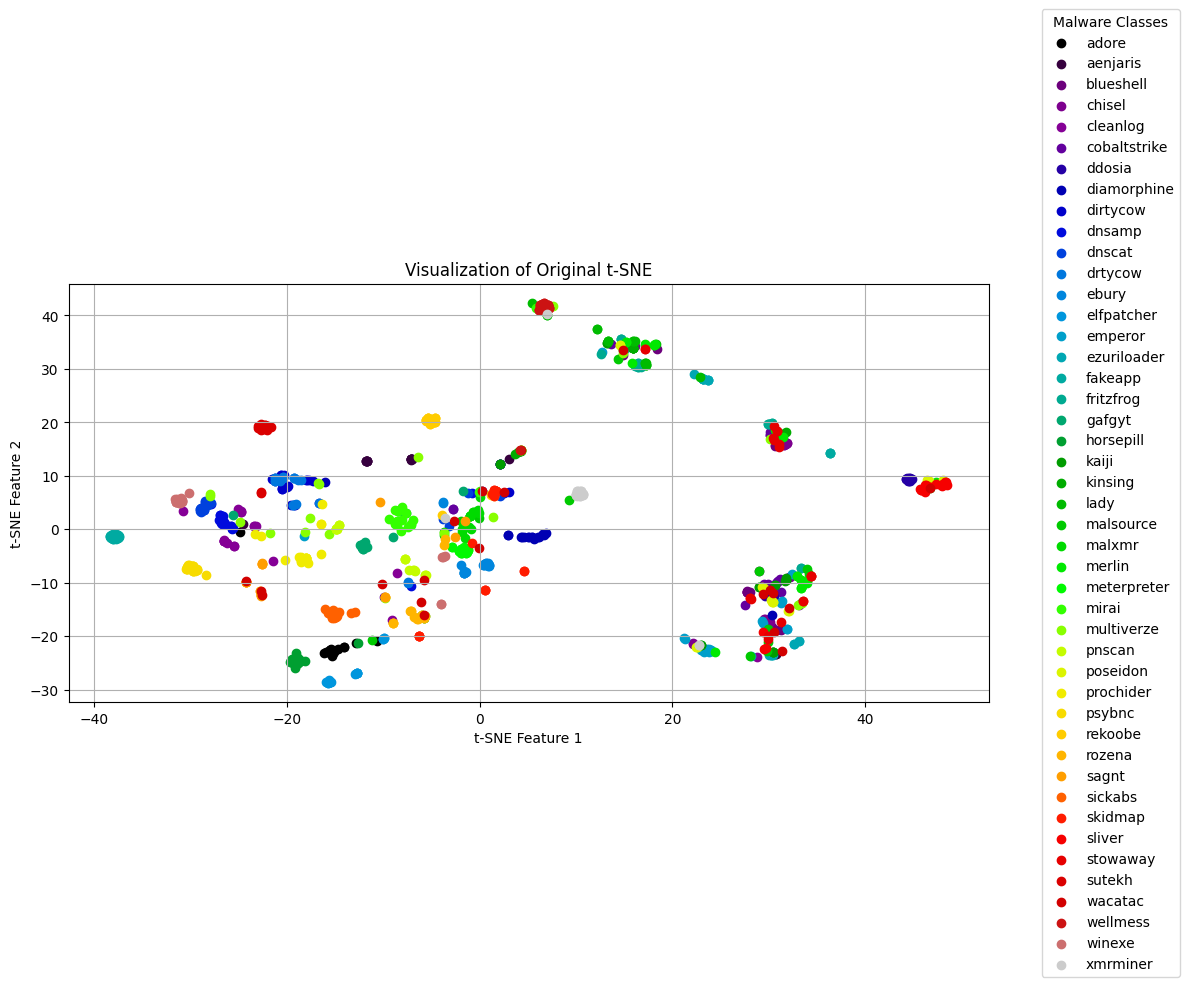

In [22]:

plotting.plot_original_tsne(tsne_data=train_X, y_labels=train_y, label_mapping=train_map)

AttributeError: 'malwareDetector' object has no attribute 'mkdir'

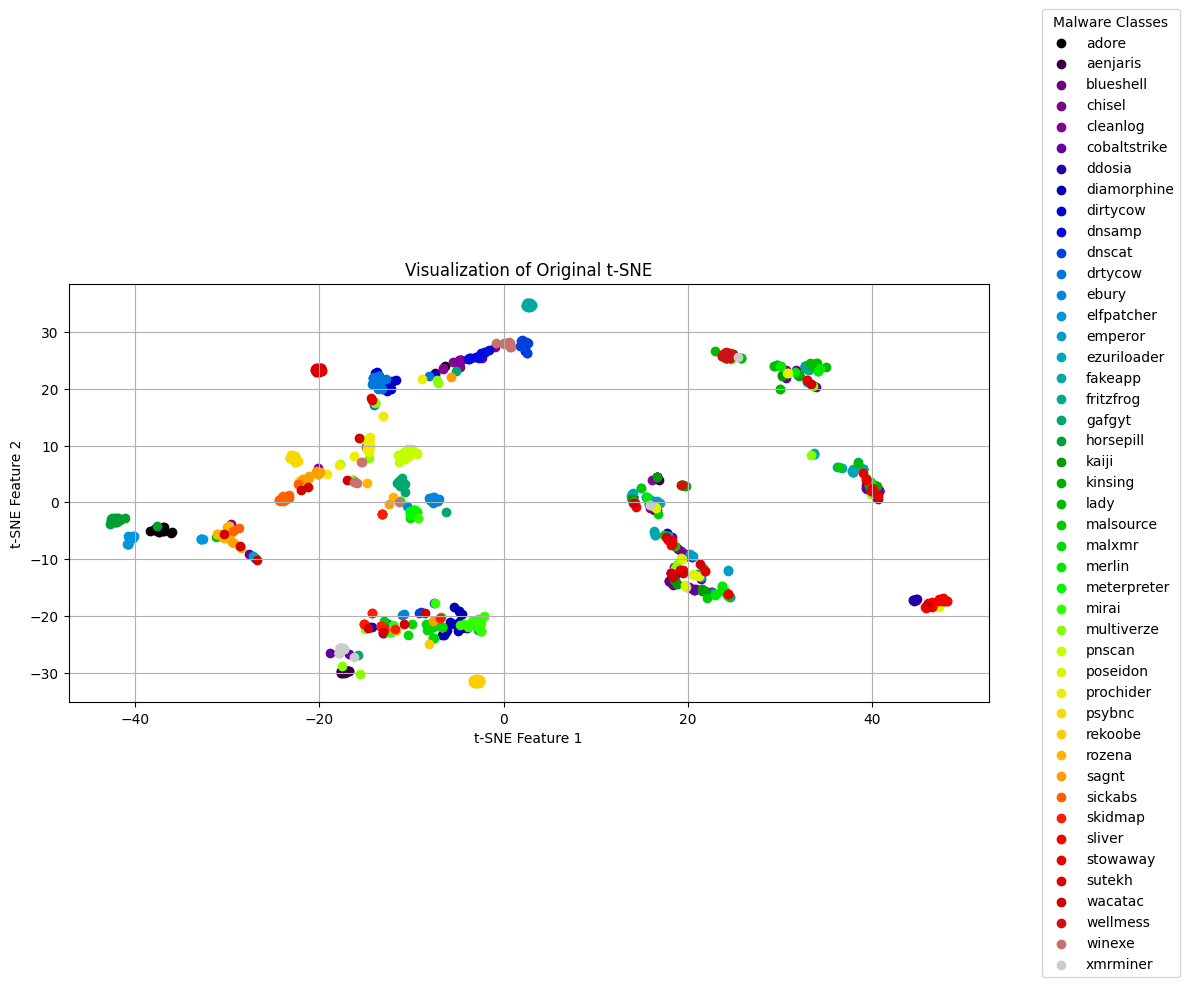

In [23]:
import torch
model = detector.get_model(featureDim=1000)
model.eval()
tensorTrain = torch.from_numpy(train_X).float()
embeddingTrain = model(tensorTrain).detach().numpy()

plotting.plot_original_tsne(tsne_data=embeddingTrain, y_labels=train_y, label_mapping=train_map)

AttributeError: 'malwareDetector' object has no attribute 'mkdir'

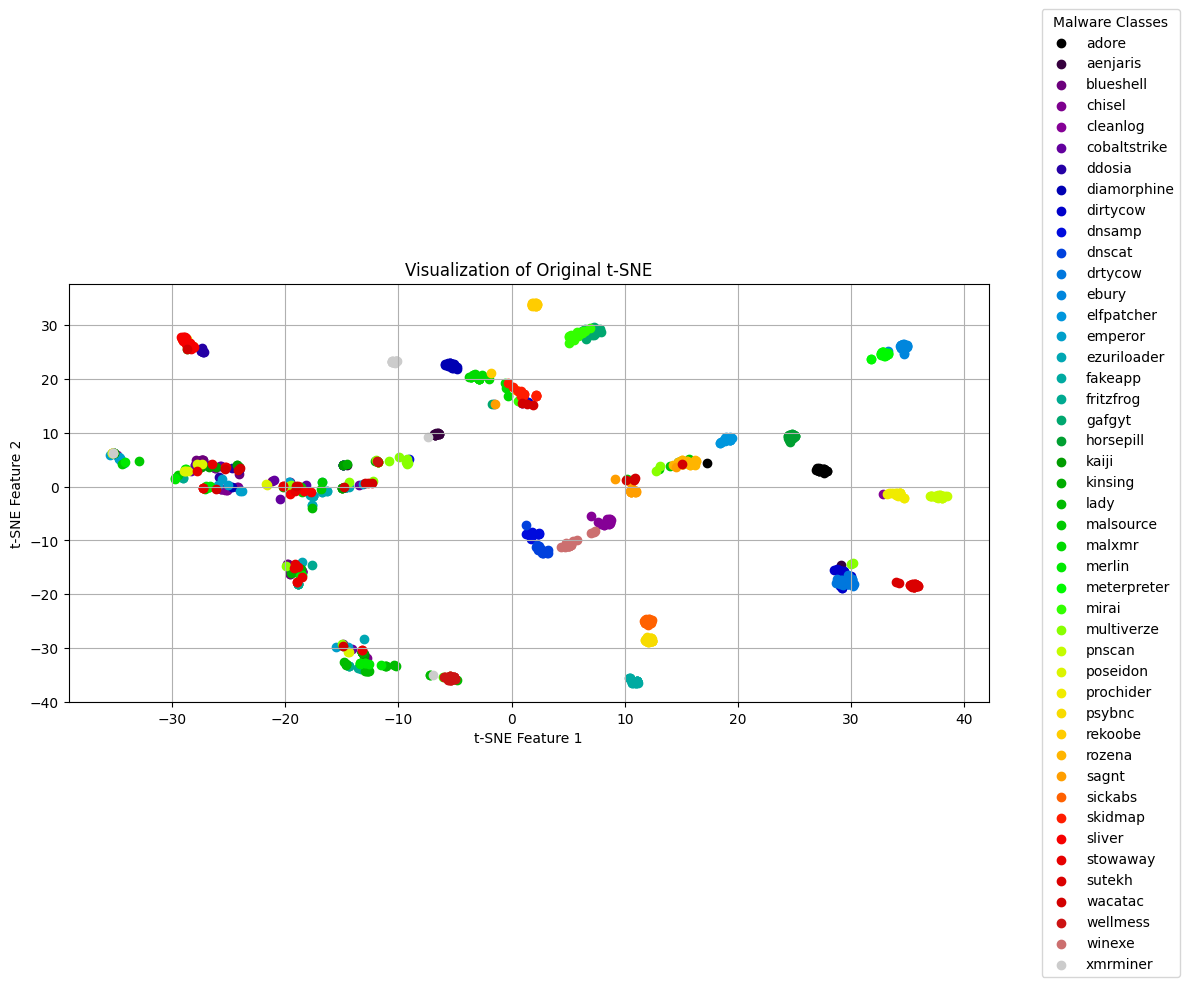

In [25]:
import torch
model = detector.get_model(modelName=detector.model_name+"_check_point", featureDim=200)
model.eval()
tensorTrain = torch.from_numpy(train_X).float()
embeddingTrain = model(tensorTrain).detach().numpy()

plotting.plot_original_tsne(tsne_data=embeddingTrain, y_labels=train_y, label_mapping=train_map)

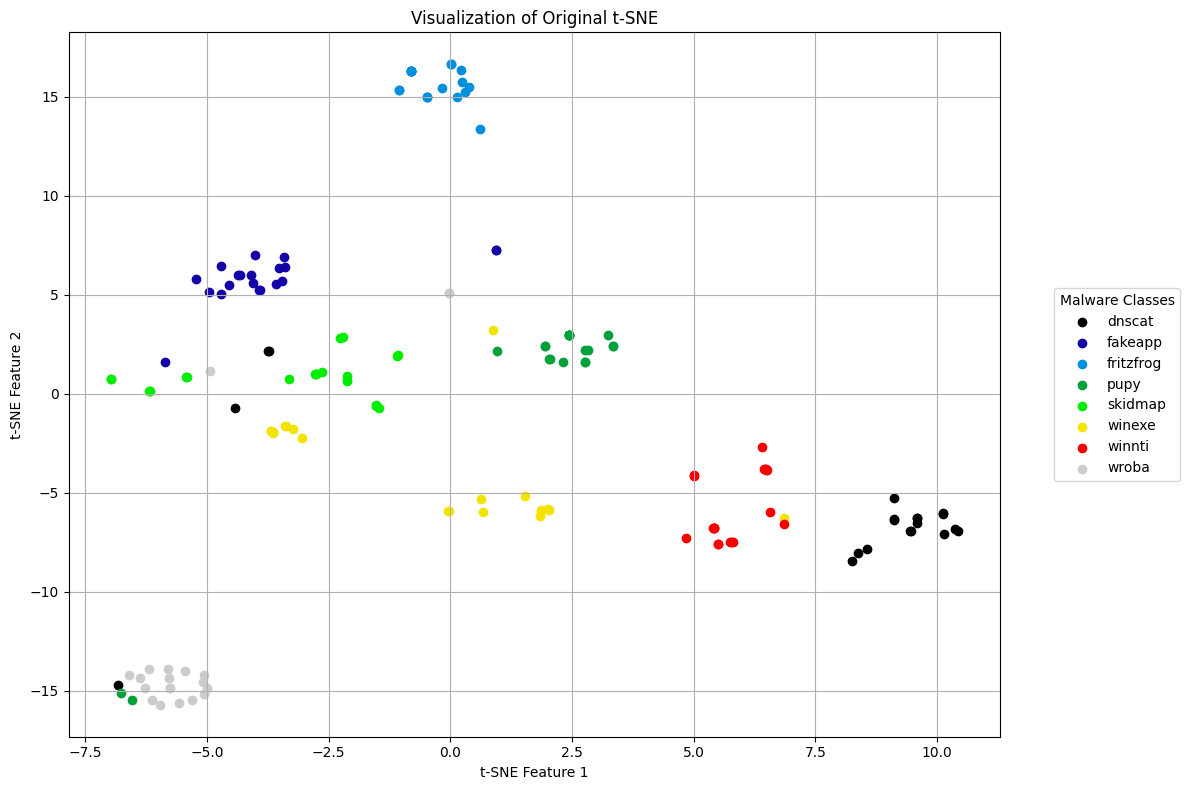

In [123]:
plotting.plot_original_tsne(tsne_data=val_X, y_labels=val_y, label_mapping=val_map)

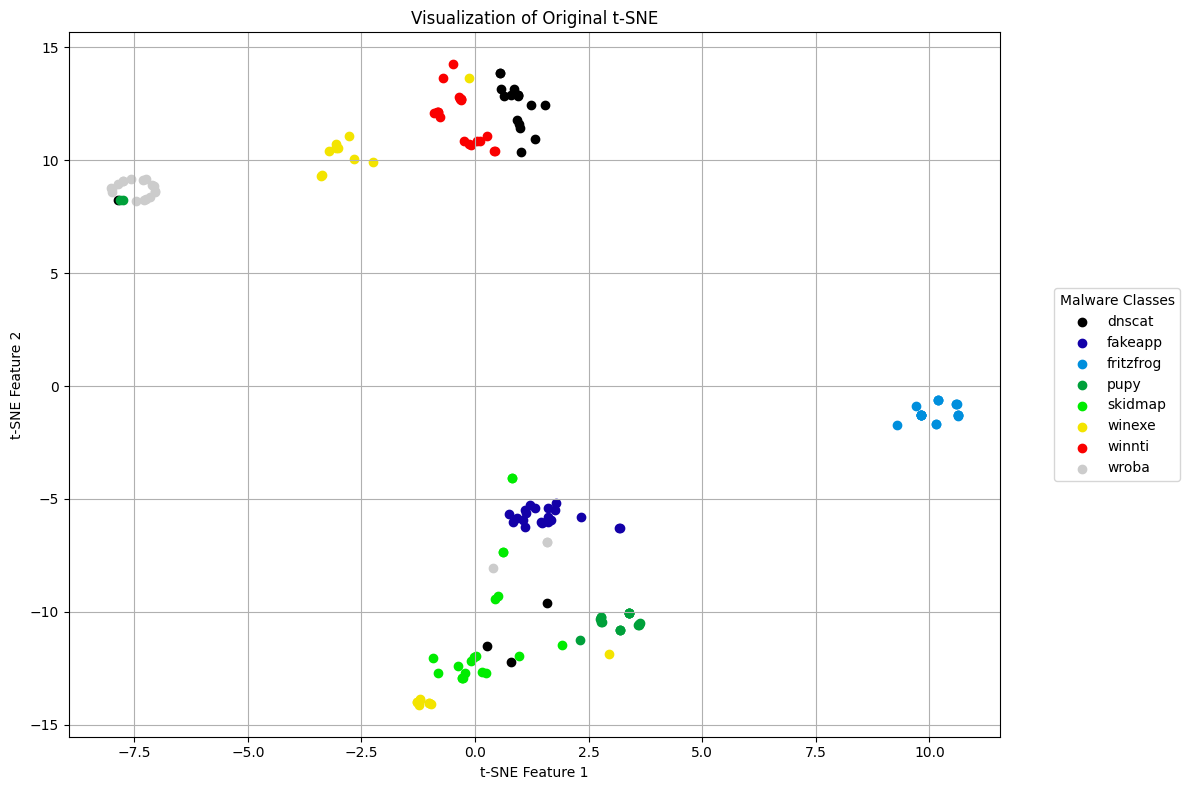

In [124]:
import torch
model = detector.get_model()
model.eval()
tensorVal = torch.from_numpy(val_X).float()
embeddingVal = model(tensorVal).detach().numpy()

plotting.plot_original_tsne(tsne_data=embeddingVal, y_labels=val_y, label_mapping=val_map)

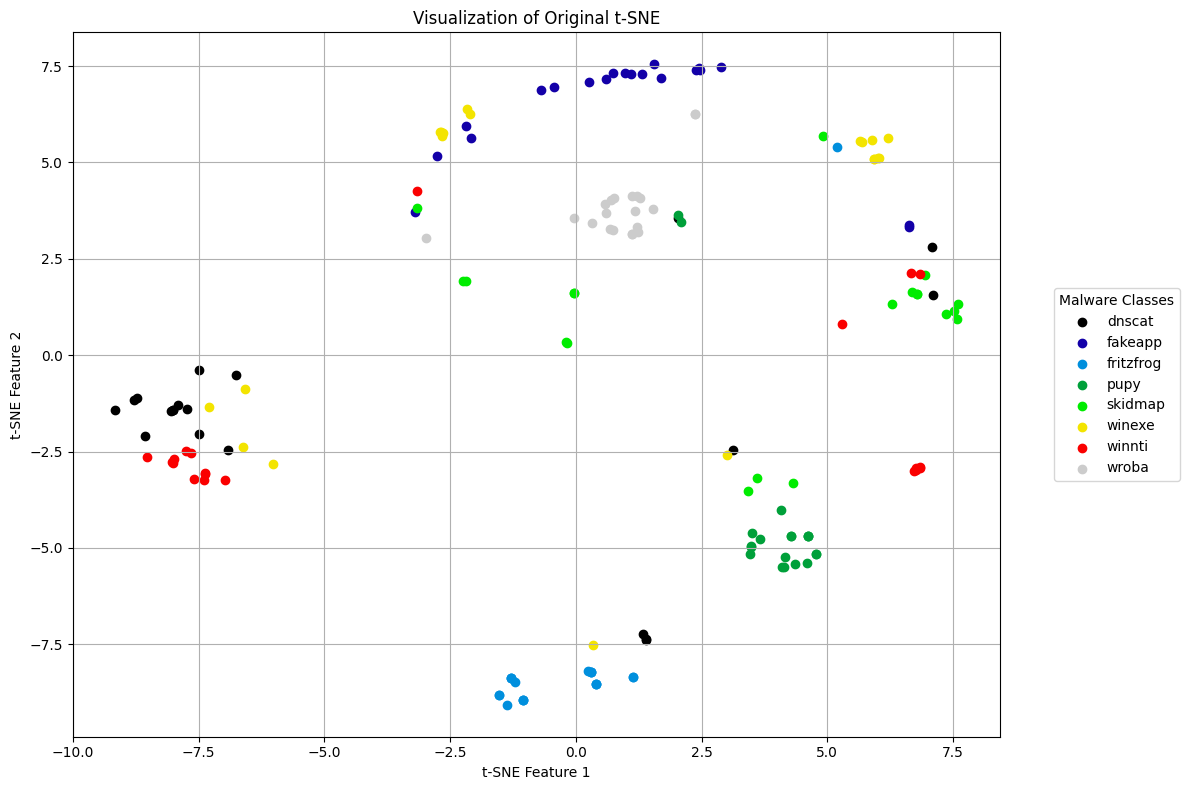

In [125]:
import torch
model = detector.get_model(detector.model_name+"_check_point")
model.eval()
tensorVal = torch.from_numpy(val_X).float()
embeddingVal = model(tensorVal).detach().numpy()

plotting.plot_original_tsne(tsne_data=embeddingVal, y_labels=val_y, label_mapping=val_map)

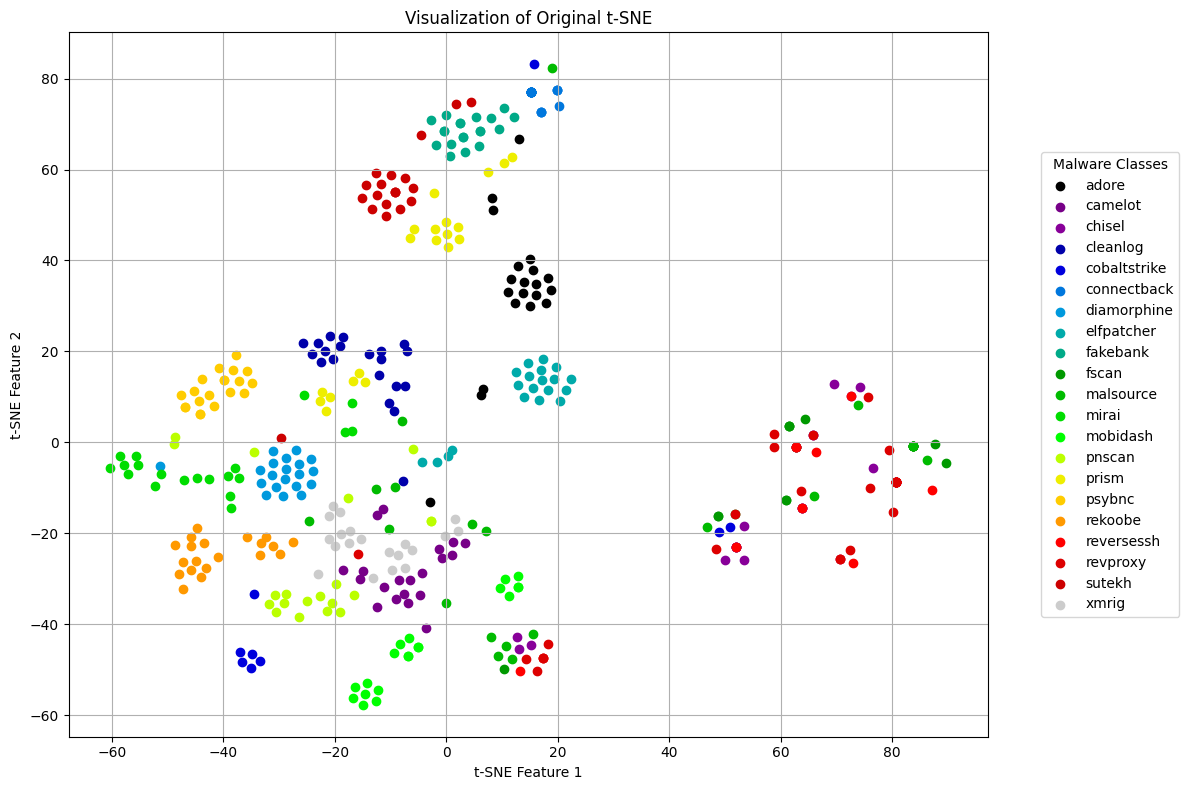

In [126]:
plotting.plot_original_tsne(tsne_data=test_X, y_labels=test_y, label_mapping=test_map)

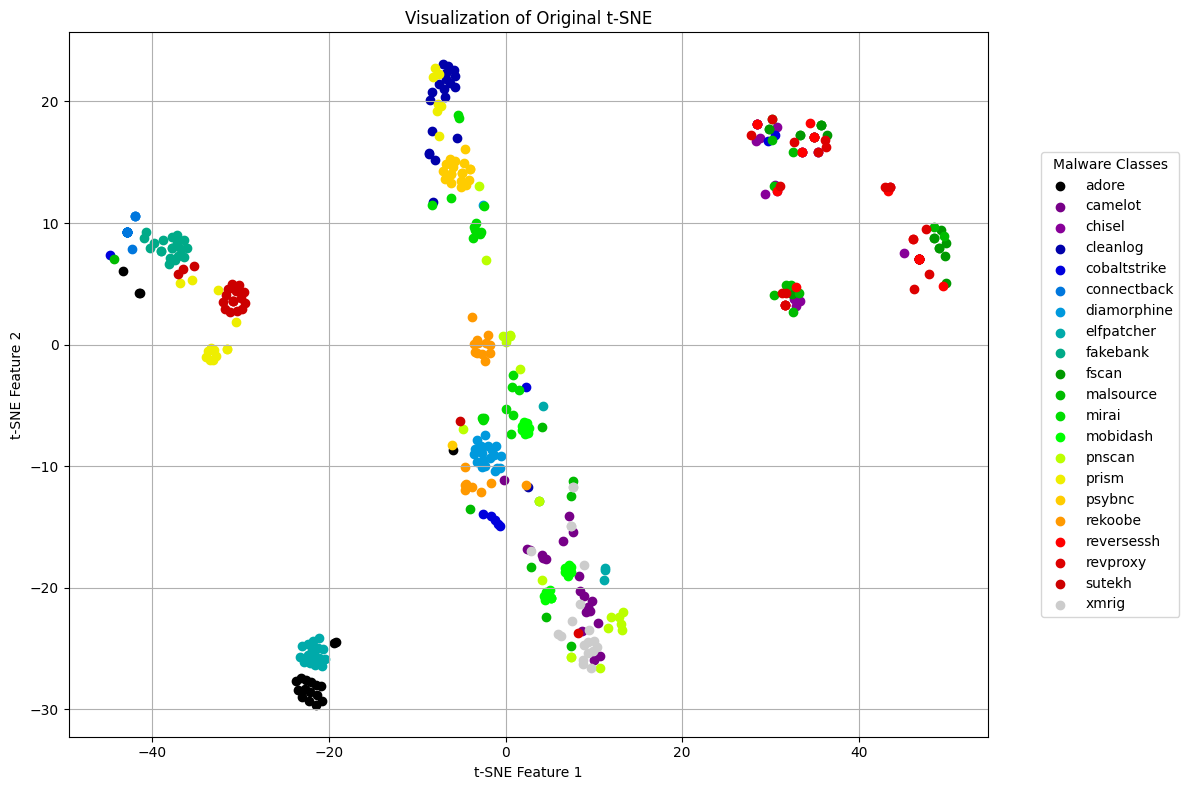

In [127]:
import torch
model = detector.get_model()
model.eval()
tensorTest = torch.from_numpy(test_X).float()
embeddingTest = model(tensorTest).detach().numpy()

plotting.plot_original_tsne(tsne_data=embeddingTest, y_labels=test_y, label_mapping=test_map)

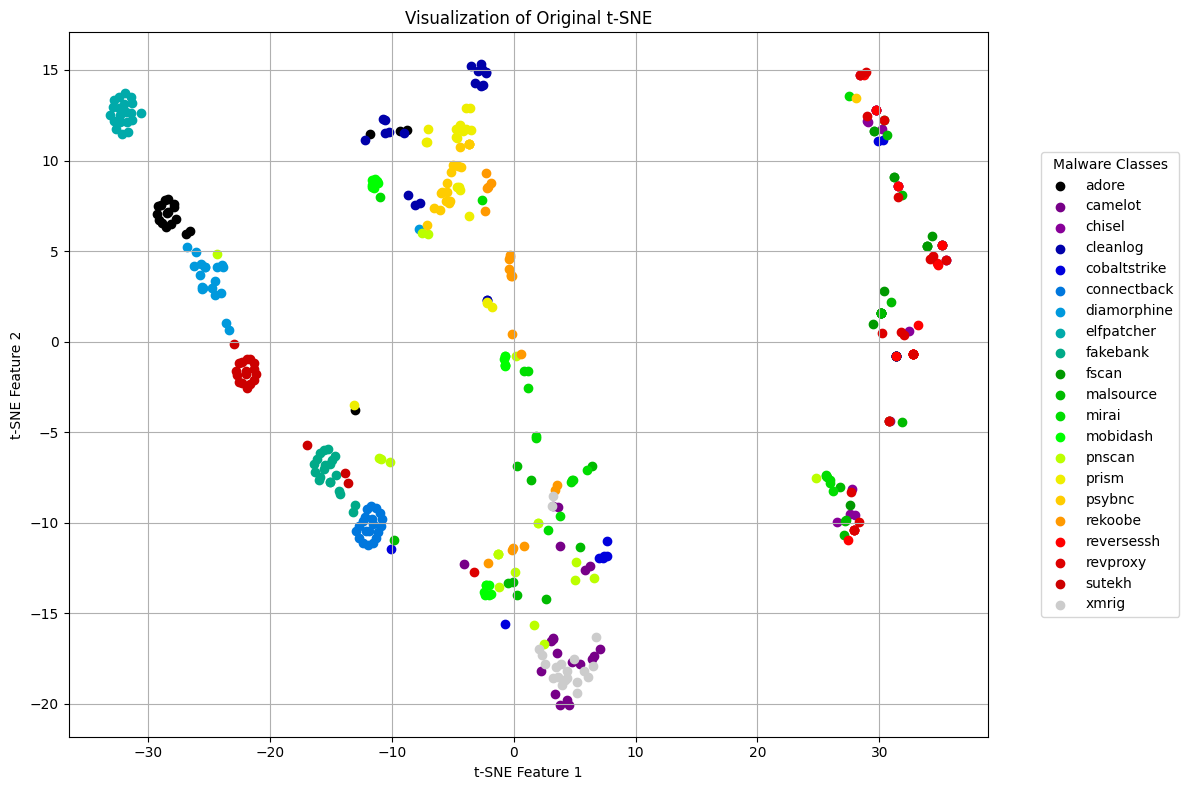

In [128]:
import torch
model = detector.get_model(modelName=detector.model_name+"_check_point")
model.eval()
tensorTest = torch.from_numpy(test_X).float()
embeddingTest = model(tensorTest).detach().numpy()

plotting.plot_original_tsne(tsne_data=embeddingTest, y_labels=test_y, label_mapping=test_map)

In [13]:
# machine learning

X = test_X
y = test_y


In [14]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from itertools import combinations

def run_experiment_SVM(X, y, n_experiments=100, n_ways=5, k_shots=5):
    classes = np.unique(y)
    
    accuracies = []
    
    for _ in range(n_experiments):
        # 隨機選擇5個類別
        selected_classes = np.random.choice(classes, n_ways, replace=False)
        
        train_indices = []
        test_indices = []
        
        for cls in selected_classes:
            cls_indices = np.where(y == cls)[0]
            train_indices.extend(np.random.choice(cls_indices, k_shots, replace=False))
            test_indices.extend([idx for idx in cls_indices if idx not in train_indices])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        # 訓練SVM
        svm = SVC(kernel='rbf', gamma='scale')
        svm.fit(X_train, y_train)
        
        # 預測並計算準確率
        y_pred = svm.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    
    return np.mean(accuracies)

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def run_experiment_KNN(X, y, n_experiments=100, n_ways=5, k_shots=5):
    classes = np.unique(y)
    
    accuracies = []
    for _ in range(n_experiments):
        # 隨機選擇5個類別
        selected_classes = np.random.choice(classes, n_ways, replace=False)
        
        train_indices = []
        test_indices = []
        
        for cls in selected_classes:
            cls_indices = np.where(y == cls)[0]
            train_indices.extend(np.random.choice(cls_indices, k_shots, replace=False))
            test_indices.extend([idx for idx in cls_indices if idx not in train_indices])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        # 訓練KNN
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X_train, y_train)
        
        # 預測並計算準確率
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    
    return np.mean(accuracies)

In [16]:
avg_accuracy = run_experiment_SVM(X, y, n_ways=5, k_shots=5)
print(f"Average 5-way 5-shot accuracy: {avg_accuracy:.4f}")
avg_accuracy = run_experiment_SVM(X, y, n_ways=10, k_shots=5)
print(f"Average 10-way 5-shot accuracy: {avg_accuracy:.4f}")

Average 5-way 5-shot accuracy: 0.7415
Average 10-way 5-shot accuracy: 0.6458


In [17]:
avg_accuracy = run_experiment_KNN(X, y, n_ways=5, k_shots=5)
print(f"Average 5-way 5-shot accuracy: {avg_accuracy:.4f}")
avg_accuracy = run_experiment_KNN(X, y, n_ways=10, k_shots=5)
print(f"Average 10-way 5-shot accuracy: {avg_accuracy:.4f}")

Average 5-way 5-shot accuracy: 0.9247
Average 10-way 5-shot accuracy: 0.8973


In [18]:
import torch
model = detector.get_model(featureDim=500)
model.eval()
tensorTest = torch.from_numpy(test_X).float()
embeddingTest = model(tensorTest).detach().numpy()
avg_accuracy = run_experiment_KNN(embeddingTest, test_y, n_ways=5, k_shots=5)
print(f"Average 5-way 5-shot accuracy: {avg_accuracy:.4f}")

Average 5-way 5-shot accuracy: 0.8705
